In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

CREATE SIX & TW1 DATASETS

In [2]:
six = pd.read_table("NSDUH_2006_Tab.tsv",
                    sep='\t', 
                    header = 0, 
                    index_col = 0, 
                    low_memory=False)

In [3]:
tw1 = pd.read_table("NSDUH_2021_Tab.txt",
                    sep='\t', 
                    header = 0, 
                    index_col = 0, 
                    low_memory=False)

CREATE CLASS VARIABLES FOR EACH YEAR (OUD)

In [4]:
six["COMB"] = (
    six["PROCODNP"]
    +six["OXYCODP2"]
    +six["HYDCODOP"]
    +six["TRAMADP"])
six["CLASS"] = 0
six.loc[(six["COMB"]>0) & (six["ANLYR"]==1),"CLASS"]=1
six.loc[(six["HERYR"]==1) | (six["OXYYR"]==1),"CLASS"]=1

In [31]:
tw1["CLASS"] = tw1["OPINMYR"]

ACTUAL 2006 POPULATION WAS 300M; NSDUH esimates 246M

In [6]:
six["ANALWT_C"].sum()

246021655.73427114

ACTUAL 2021 POPULATION WAS 331M; NSDUH estimates 280M

In [7]:
tw1["ANALWT_C"].sum()

279843943.5445435

SO BOTH ESTIMATES ARE ABOUT 50M LOW (about 20% for 2006; 18% for 2021)

according to usafacts.org, number of 35-49 y/o in 2006 was 66M

In [8]:
six.loc[(six["CATAG3"]==4)]["ANALWT_C"].sum()

64766177.30882517

according to usafacts.org, number of 35-49 y/o in 2021 was 63M

In [9]:
tw1.loc[(tw1["CATAG3"]==4)]["ANALWT_C"].sum()

62187799.67613914

In [32]:
tw1.loc[(tw1["CATAG3"]==4)&(tw1["CLASS"]==1)]["ANALWT_C"].sum()

2378583.138454185

In [11]:
six.loc[(six["CATAG3"]==4)&(six["CLASS"]==1)]["ANALWT_C"].sum()

2870170.22467075

<Axes: title={'center': 'Volume of Deaths for top 10 Causes of Death in the US, 2021'}>

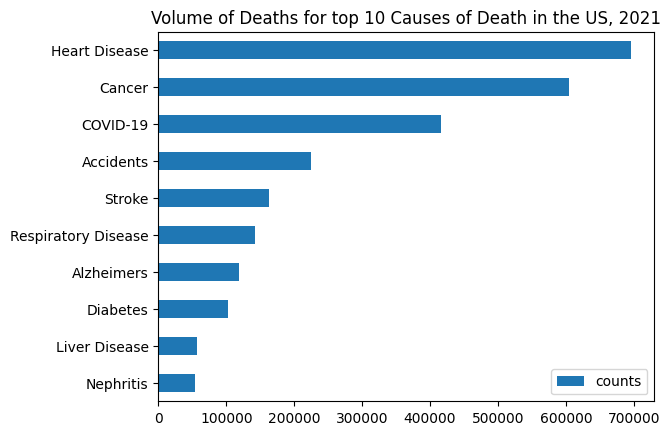

In [12]:
counts = [54358,56585,103294,119399,142342,162890,224935,416893,605213,695547]
index = ['Nephritis','Liver Disease','Diabetes','Alzheimers','Respiratory Disease',
         'Stroke','Accidents','COVID-19','Cancer','Heart Disease']
d = {"counts":counts}

deaths = pd.DataFrame(data=d, index=index)

deaths.plot.barh(title="Volume of Deaths for top 10 Causes of Death in the US, 2021")

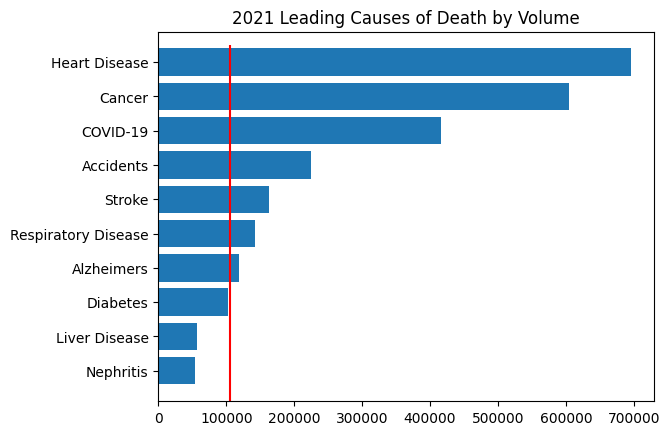

In [29]:
fig,ax = plt.subplots()

cod = ['Nephritis','Liver Disease','Diabetes','Alzheimers','Respiratory Disease',
         'Stroke','Accidents','COVID-19','Cancer','Heart Disease']

vol = [54358,56585,103294,119399,142342,162890,224935,416893,605213,695547]

ax.vlines(106000,ymin=-2,ymax = 9.5,color="red")
ax.barh(cod,vol)
ax.set_title("2021 Leading Causes of Death by Volume")
plt.show()